Let's look at some Air BNB datasets

First i'll take a look at available datasets to get a better understanding.

# Gather

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('./data/listings.csv')
reviews = pd.read_csv('./data/reviews.csv')
calendar = pd.read_csv('./data/calendar.csv')

# Assess

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


The 'listings' Dataset has 92 columns and seems to describe individual objects listed by Air BNB.

In [4]:
print('individual listings:' , listings.id.value_counts().size)
print('listing count:' , listings.shape[0])

individual listings: 3818
listing count: 3818


Objects in the 'listings' dataset seem to be unique objects

In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


The 'reviews' dataset has 6 columns and seems to describe individuals reviews for objects listed in the 'listings' dataset. This data provides information about the reviewer an the placed review, but no rating.

In [6]:
print('listing objects reviewed:' , reviews.listing_id.value_counts().size)
print('review count:' , reviews.shape[0])

listing objects reviewed: 3191
review count: 84849


We seem to have multiple reviews per object of the 'listings' dataset, but not every objects has received a review yet.

In [7]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


The 'calendar' dataset has 4 columns and seems to describe availability and price for objects listend in the 'listings' dataset. Availability is described by 't' for true and 'f' for false, i'll have to clean this up for further processing.

In [8]:
print('listing objects in calendar:' , calendar.listing_id.value_counts().shape[0])
print('calendar entries:' , calendar.shape[0])

listing objects in calendar: 3818
calendar entries: 1393570


Unlike for reviews we have calendar and availability data on every object of the 'listings' dataset.

In [9]:
print('Entries for first day of calendar data:',calendar[calendar.date == '2016-01-04'].shape[0])
print('Entries for last day of calendar data:',calendar[calendar.date == '2017-01-02'].shape[0])
print('Entries per listing' , calendar.shape[0] / calendar.listing_id.value_counts().shape[0])

Entries for first day of calendar data: 3818
Entries for last day of calendar data: 3818
Entries per listing 365.0


# Clean

In [ ]:
# helper function
def convert_price_to_number(df, column):
    '''
    Converts prices a s string to number, strips '$' signs
    
    INPUT:
    df - pandas dataframe containing the column
    column - single column name to convert

    OUTPUT:
    series of converted prices, removed dollar sign, as numeric
    '''
    remove_dollar_sign = lambda x: str(x).replace('$', '').replace(',', '')
    return pd.to_numeric(df[column].apply(remove_dollar_sign), errors='coerce')

In [ ]:
# Clean calender data 
# transforming price to numbers
calendar.price = convert_price_to_number(calendar, 'price')
# transfor date to python datetime
calendar['date'] = pd.to_datetime(calendar['date'])

The calendar dataset seems to describe excatly one year of availability an price data.

It would be interesting to see if prices change over the course of a year.

# Analyze

In [10]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [11]:
price_variance = calendar[calendar.available == 't'][['listing_id','price']].groupby('listing_id').agg(min_price=('price', np.min), max_price=('price', np.max), std_price=('price',np.std)) 
price_variance['diff_price'] = price_variance.max_price - price_variance.min_price
price_variance['diff_price_percent'] = (price_variance.max_price / price_variance.min_price - 1) * 100
price_variance[price_variance.diff_price != 0].sort_values('diff_price_percent')

,min_price,max_price,std_price,diff_price,diff_price_percent
listing_id,,,,,
6358605,65.0,66.0,0.451614,1.0,1.538462
5863558,64.0,65.0,0.290827,1.0,1.562500
4645405,59.0,60.0,0.277121,1.0,1.694915
4539948,118.0,120.0,0.534522,2.0,1.694915
1097766,54.0,55.0,0.468374,1.0,1.851852
...,...,...,...,...,...
7967844,63.0,340.0,49.852645,277.0,439.682540
6020744,129.0,733.0,102.471084,604.0,468.217054
2715623,144.0,1240.0,91.531967,1096.0,761.111111


The calendar data shows that more than half of the listed objects changed prices in the course of a year. Some only slightly but othery by a factor of 25.

How do prices change over the course of a year? are there local or abolsute maxima?

Text(0.5, 0, 'Date')

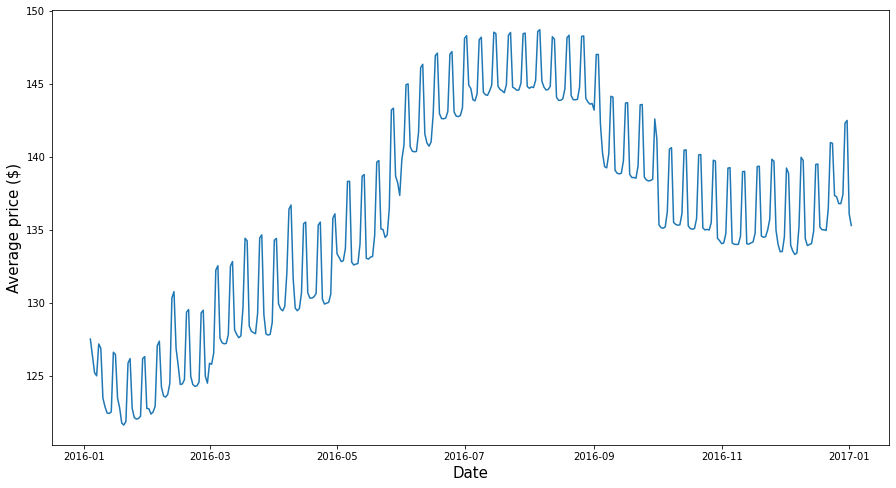

In [12]:
# Prices should be filled forward becaue an object still hast a price while it is not available
calendar_forwad_filled = calendar.ffill()
calendar_grouped_by_price = calendar_forwad_filled.groupby('date').mean('price').reset_index()
plt.figure(figsize=(15, 8))
plot = sns.lineplot(x="date", y="price", data=calendar_grouped_by_price);
plot.set_ylabel('Average price ($)', fontsize = 15)
plot.set_xlabel ('Date', fontsize = 15)

In this graph we can see a high price period from August to September. There also appears to bea another increase arounce New Years. The overall price has increased over the span of the year. Wen can also identify short period increases in price. Let's investigate.

Text(0.5, 0, 'Day')

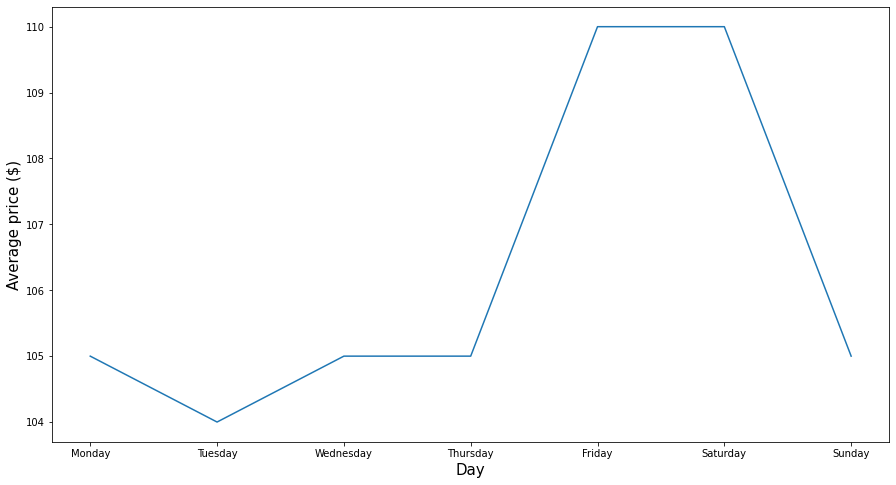

In [13]:
calendar['weekday'] = calendar['date'].dt.day_name()
calendar['weekday_int'] = calendar['date'].dt.weekday

# Prices should be filled forward becaue an object still hast a price while it is not available
calendar_forwad_filled = calendar.ffill()

calendar_grouped_by_price = calendar_forwad_filled.groupby(['weekday','weekday_int']).median('price').reset_index()
calendar_grouped_by_price_sort = calendar_grouped_by_price[['weekday','weekday_int','price']].sort_values('weekday_int', ascending=True)

calendar_by_weakday = calendar_forwad_filled.groupby('weekday');

plt.figure(figsize=(15, 8))
plot = sns.lineplot(x="weekday", y="price", data=calendar_grouped_by_price_sort);
plot.set_ylabel('Average price ($)', fontsize = 15)
plot.set_xlabel ('Day', fontsize = 15)

Saturday and Friday seem to have significantly higher prices than other weekdays

Do more Reviews drive price up

             id  date  reviewer_id  reviewer_name  comments
listing_id                                                 
4291         35    35           35             35        35
5682        297   297          297            297       296
6606         52    52           52             52        52
7369         40    40           40             40        40
9419         79    79           79             79        79


Text(0.5, 0, 'Reviews')

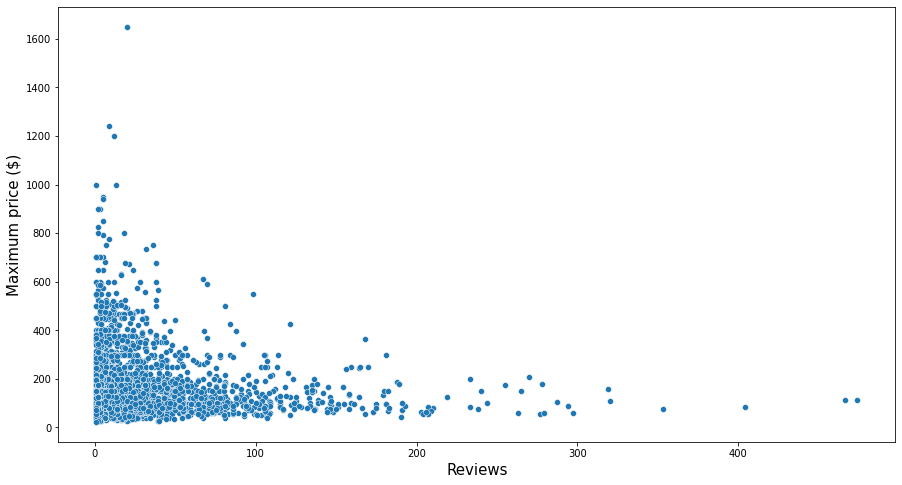

In [14]:
review_count = reviews.groupby('listing_id').count()
print(review_count.sort_index().head())
price_variance['reviews'] = review_count.id

price_variance.sort_values('max_price', ascending=False)

plt.figure(figsize=(15, 8))
plot = sns.scatterplot(x="reviews", y="max_price", data=price_variance);
plot.set_ylabel('Maximum price ($)', fontsize = 15)
plot.set_xlabel ('Reviews', fontsize = 15)

Many Reviews do not seem to drive price upwards.